In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# Установка общего стиля для графиков
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'DejaVu Sans'  # Стандартный шрифт для Google Colab
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

# Загрузка данных из вашей ссылки на Google Drive
data_url = 'https://drive.google.com/uc?id=1ui60y9ch0NUQv3kYTP5avHd9cUIKA_k7'  # Прямая ссылка на файл
sleep_data = pd.read_csv(data_url)

# Первичная обработка данных
sleep_data = sleep_data.dropna()  # Удаление пустых значений

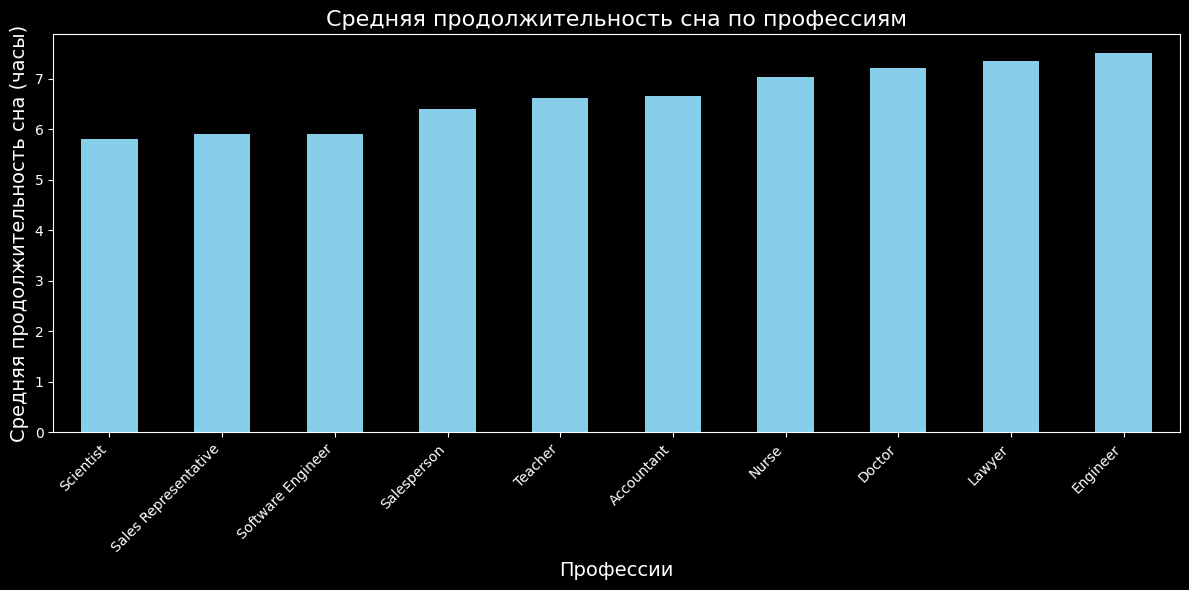

In [7]:
# 1. Столбчатая диаграмма: Средняя продолжительность сна по профессиям
average_sleep_by_occupation = sleep_data.groupby("Occupation")['Sleep Duration'].mean().sort_values()

plt.figure(figsize=(12, 6))
average_sleep_by_occupation.plot(kind="bar", color="skyblue")
plt.title("Средняя продолжительность сна по профессиям", fontsize=16)
plt.xlabel("Профессии", fontsize=14)
plt.ylabel("Средняя продолжительность сна (часы)", fontsize=14)
plt.xticks(rotation=45, fontsize=10, ha="right")
plt.tight_layout()
plt.savefig("average_sleep_by_occupation.png")
plt.show()

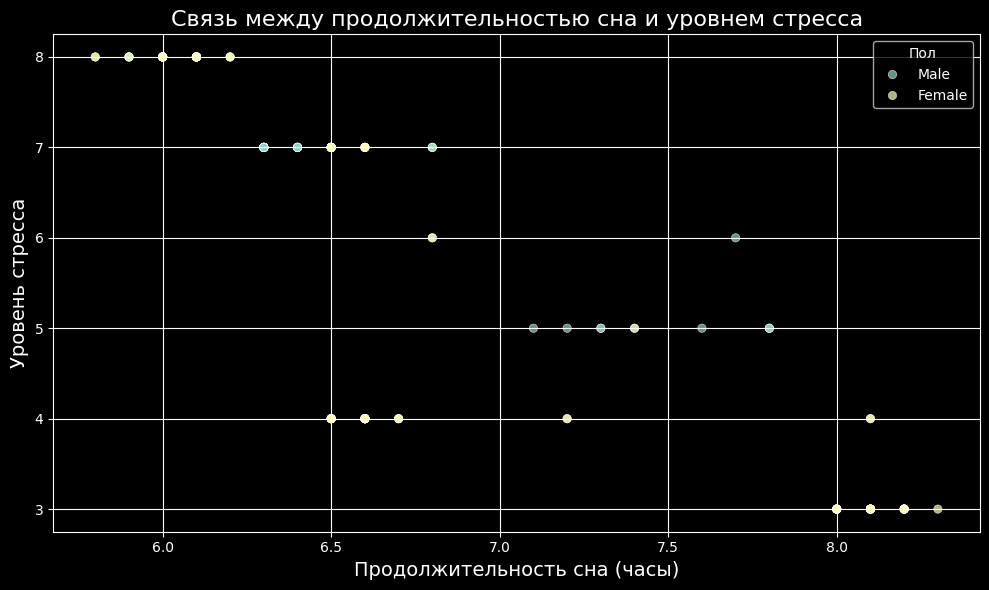

In [8]:
# 2. Точечная диаграмма: Связь между продолжительностью сна и уровнем стресса
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sleep_data, x="Sleep Duration", y="Stress Level", hue="Gender", alpha=0.7)
plt.title("Связь между продолжительностью сна и уровнем стресса", fontsize=16)
plt.xlabel("Продолжительность сна (часы)", fontsize=14)
plt.ylabel("Уровень стресса", fontsize=14)
plt.legend(title="Пол")
plt.grid()
plt.tight_layout()
plt.savefig("sleep_stress_correlation.png")
plt.show()


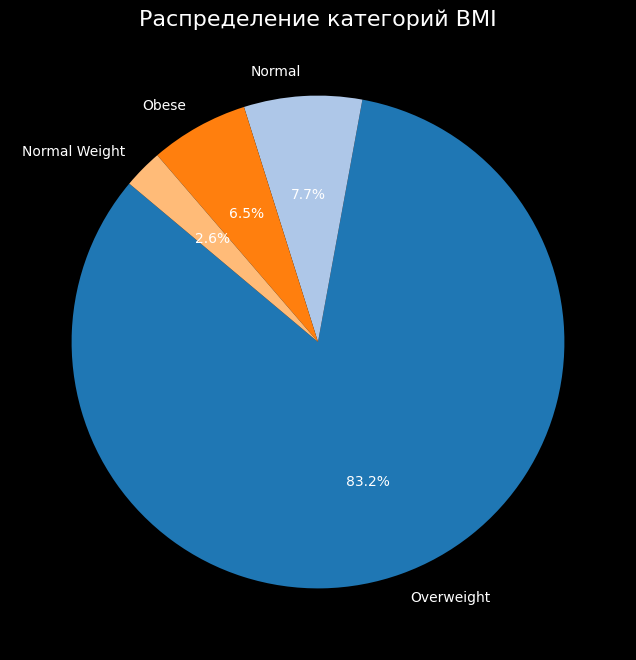

In [9]:
# 3. Круговая диаграмма: Распределение категорий BMI
bmi_distribution = sleep_data['BMI Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(bmi_distribution, labels=bmi_distribution.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Распределение категорий BMI", fontsize=16)
plt.savefig("bmi_distribution.png")
plt.show()

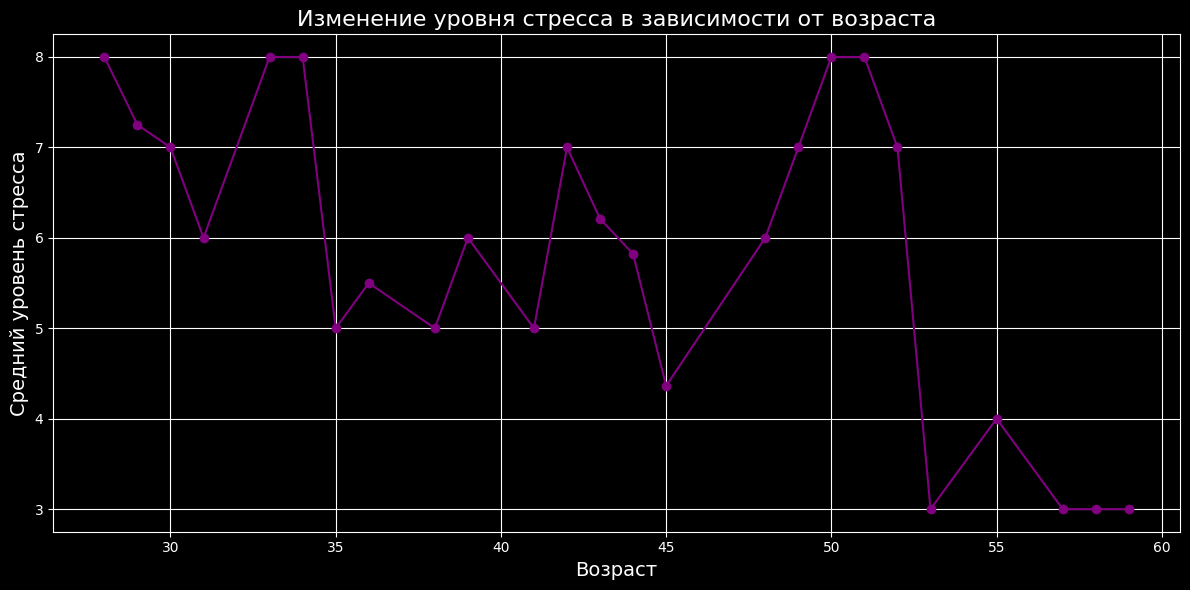

In [13]:
# 4. Линейная диаграмма: Изменение уровня стресса в зависимости от возраста
if 'Age' not in sleep_data.columns or 'Stress Level' not in sleep_data.columns:
    print("Колонки 'Age' или 'Stress Level' отсутствуют в данных. Пожалуйста, проверьте входной файл.")
else:
    # Группировка данных по возрасту и расчет среднего уровня стресса
    stress_by_age = sleep_data.groupby('Age')['Stress Level'].mean()

    # Построение графика
    plt.figure(figsize=(12, 6))
    stress_by_age.plot(kind='line', marker='o', color='purple')
    plt.title("Изменение уровня стресса в зависимости от возраста", fontsize=16)
    plt.xlabel("Возраст", fontsize=14)
    plt.ylabel("Средний уровень стресса", fontsize=14)
    plt.grid()
    plt.tight_layout()
    plt.savefig("stress_by_age.png")
    plt.show()
